In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
warnings.simplefilter('ignore')

In [2]:
train_data=pd.read_csv('D:/Data Science/Assignment/17Support Vector Machine/SalaryData_Train(1).csv')
test_data=pd.read_csv('D:/Data Science/Assignment/17Support Vector Machine/SalaryData_Test(1).csv')

In [3]:
train_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
train_data['native'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [6]:
train_data['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [7]:
#null value check
train_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

There are no null value

In [8]:
le=LabelEncoder()

In [9]:
train_data['workclass']=le.fit_transform(train_data['workclass'])
train_data['education']=le.fit_transform(train_data['education'])
train_data['maritalstatus']=le.fit_transform(train_data['maritalstatus'])
train_data['occupation']=le.fit_transform(train_data['occupation'])
train_data['relationship']=le.fit_transform(train_data['relationship'])
train_data['race']=le.fit_transform(train_data['race'])
train_data['sex']=le.fit_transform(train_data['sex'])
train_data['native']=le.fit_transform(train_data['native'])
train_data['Salary']=le.fit_transform(train_data['Salary'])

In [10]:
test_data['workclass']=le.fit_transform(test_data['workclass'])
test_data['education']=le.fit_transform(test_data['education'])
test_data['maritalstatus']=le.fit_transform(test_data['maritalstatus'])
test_data['occupation']=le.fit_transform(test_data['occupation'])
test_data['relationship']=le.fit_transform(test_data['relationship'])
test_data['race']=le.fit_transform(test_data['race'])
test_data['sex']=le.fit_transform(test_data['sex'])
test_data['native']=le.fit_transform(test_data['native'])
test_data['Salary']=le.fit_transform(test_data['Salary'])

In [11]:
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [12]:
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [13]:
x_train = train_data.iloc[:,0:13]
y_train = train_data.iloc[:,13]
x_train.shape,y_train.shape

((30161, 13), (30161,))

In [14]:
#decision tree
dt_model = DecisionTreeClassifier()

In [15]:
dt_model.fit(x_train,y_train)
dt_model.feature_importances_

array([0.17644505, 0.04942505, 0.01608545, 0.12851167, 0.01118784,
       0.08268385, 0.21975856, 0.02184432, 0.00663694, 0.12639014,
       0.04186075, 0.09862323, 0.02054715])

In [16]:
total = np.cumsum(dt_model.feature_importances_)
total

array([0.17644505, 0.2258701 , 0.24195555, 0.37046721, 0.38165506,
       0.46433891, 0.68409746, 0.70594178, 0.71257873, 0.83896887,
       0.88082962, 0.97945285, 1.        ])

In [17]:
l=dt_model.feature_importances_>0.1
l

array([ True, False, False,  True, False, False,  True, False, False,
        True, False, False, False])

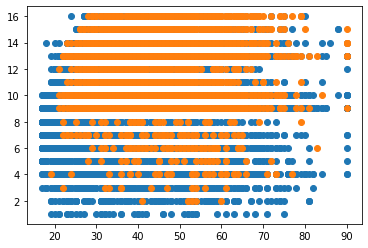

In [18]:
#plot the data
plt.scatter(train_data['age'].loc[train_data.Salary==0], train_data['educationno'].loc[train_data.Salary==0])
plt.scatter(train_data['age'].loc[train_data.Salary==1],train_data['educationno'].loc[train_data.Salary==1])
plt.show()

In [19]:
from sklearn.svm import SVC

In [20]:
#svm
svm= SVC(kernel='rbf',random_state=0,gamma=0.1,C=1.0)
svm.fit(x_train,y_train)

SVC(gamma=0.1, random_state=0)

In [21]:
#spliting
x_test= test_data.iloc[:,:13]
y_test= test_data.iloc[:,13]

In [22]:
#prediction
y_predict = svm.predict(x_test)

In [23]:
new_x_train=train_data.iloc[:,[0,3,6,9]]
new_x_train.head()

,age,educationno,relationship,capitalgain
0,39,13,1,2174
1,50,13,0,0
2,38,9,1,0
3,53,7,0,0
4,28,13,5,0


In [24]:
new_x_test=test_data.iloc[:,[0,3,6,9]]
new_x_test.head()

,age,educationno,relationship,capitalgain
0,25,7,3,0
1,38,9,0,0
2,28,12,0,0
3,44,10,0,7688
4,34,6,1,0


In [25]:
#svm
svm= SVC(kernel='rbf',random_state=0,gamma=0.10, C=1.0)
svm.fit(new_x_train,y_train)

SVC(gamma=0.1, random_state=0)

In [26]:
y_predict = svm.predict(new_x_test)
y_predict

array([0, 0, 0, ..., 1, 0, 1])

In [27]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=400)
rfe = RFE(lr_model, 3)

In [28]:
#new data of RFE
x_train_rfe = x_train.iloc[:,[3,4,6,8]]
x_test_rfe=x_test.iloc[:,[3,4,6,8]]

In [29]:
#model using RFE
svm = SVC(kernel = 'rbf', random_state = 0, gamma=0.10, C=1.0)
svm.fit(x_train_rfe, y_train)

SVC(gamma=0.1, random_state=0)

In [30]:
#train accuracy
svm.score(x_train_rfe,y_train)

0.8169821955505454

In [31]:
#test accuracy
svm.score(x_test_rfe,y_test)

0.8175298804780876